In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.compose import ColumnTransformer
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve


In [11]:
#load csv
data = pd.read_csv('train.csv')

print(data)

     PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                                 ...     ...   ... 

In [13]:
print(data.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


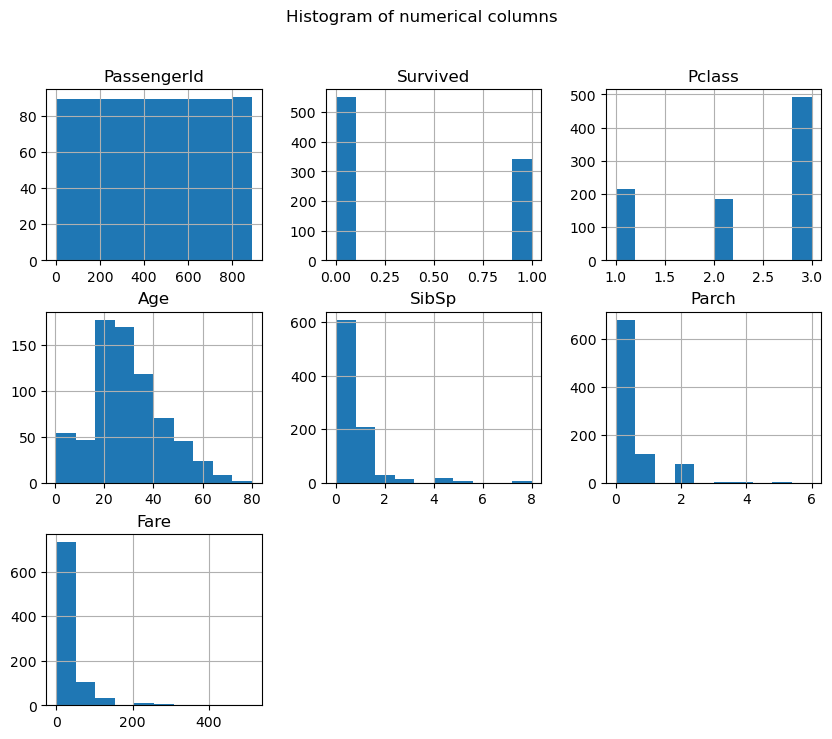

In [14]:
# Visualize
data.hist(figsize=(10, 8))
plt.suptitle('Histogram of numerical columns')
plt.show()

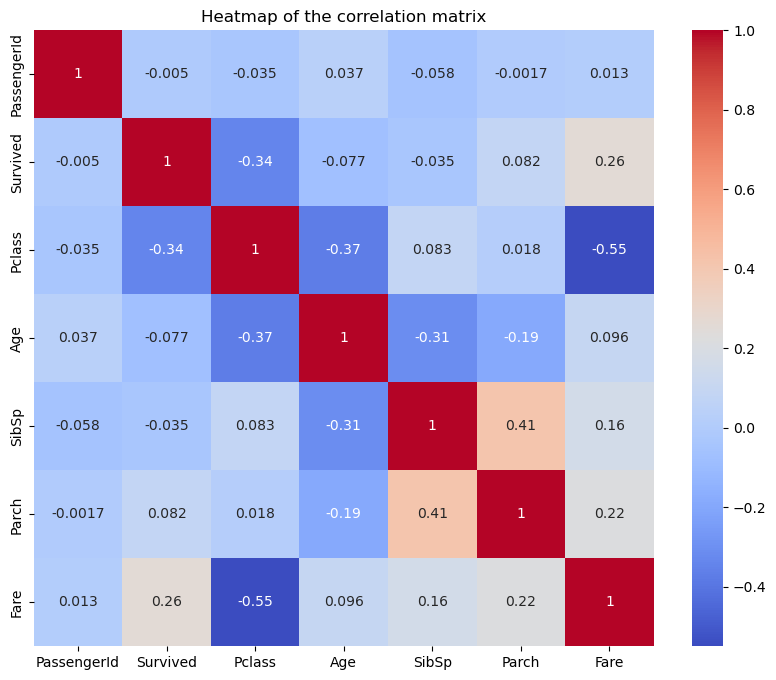

In [15]:
plt.figure(figsize=(10, 8))
# Select only numeric columns for correlation
numeric_df = data.select_dtypes(include=[np.number])

# Compute the correlation matrix
corr_matrix = numeric_df.corr()

sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Heatmap of the correlation matrix')
plt.show()


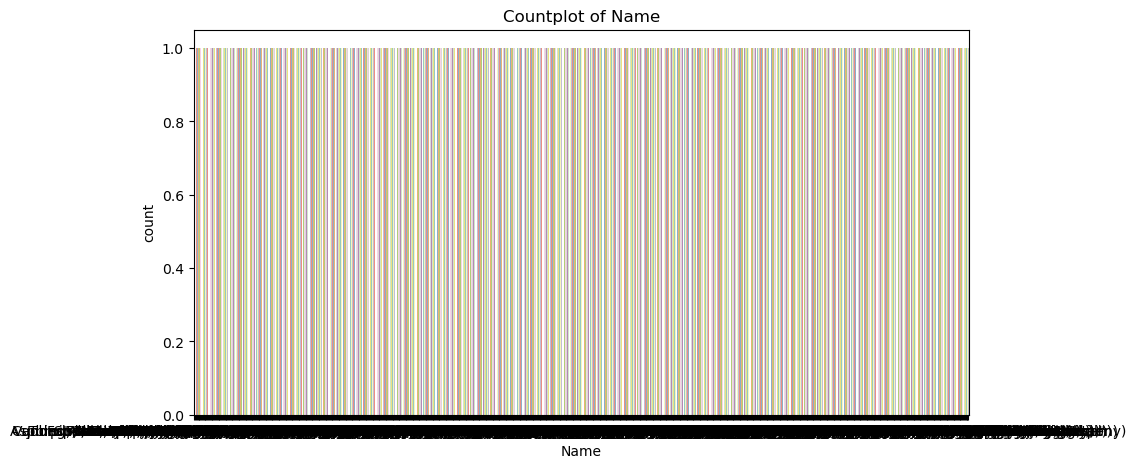

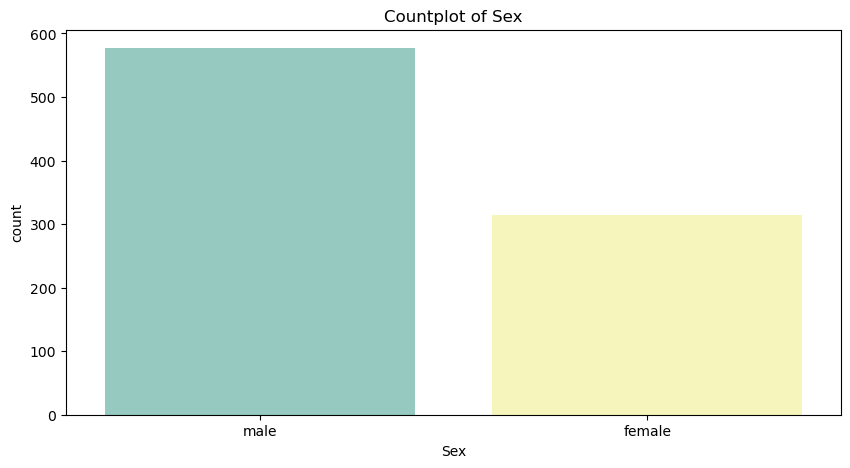

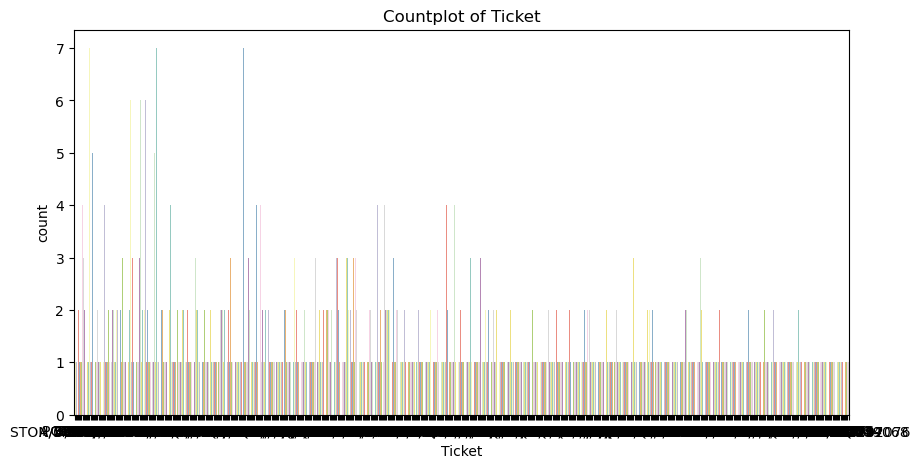

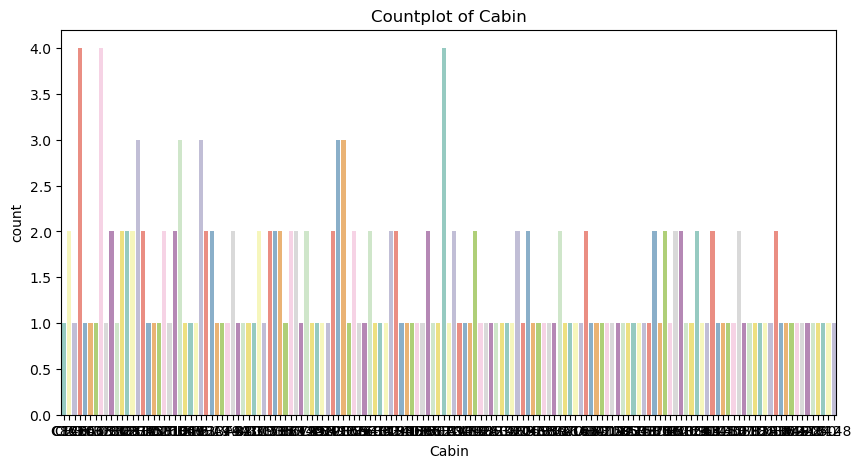

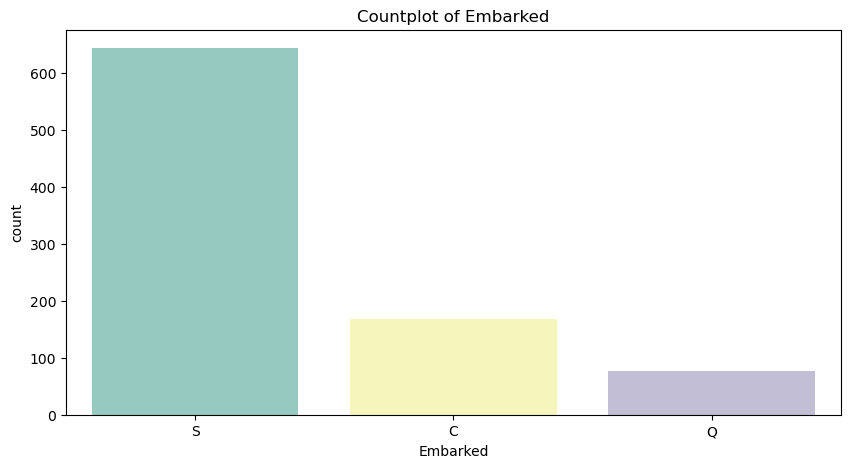

In [16]:
categorical_cols = data.select_dtypes(include=['object']).columns
for col in categorical_cols:
    plt.figure(figsize=(10, 5))
    sns.countplot(x=col, data=data, palette="Set3")
    plt.title(f'Countplot of {col}')
    plt.show()

In [17]:
df = data.drop(columns=['Cabin'])
print(df.isnull().sum())

df['Age'] = df['Age'].fillna(df['Age'].mean())
print(df.isnull().sum())

df['Embarked'] = df['Embarked'].fillna('NA')
print(df.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         2
dtype: int64
PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64
PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


In [18]:
df_cleaned = df.dropna()

# Step 9: Display the cleaned dataframe
print("\nFirst 5 rows of the cleaned dataframe:")
print(df_cleaned.head())


First 5 rows of the cleaned dataframe:
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Embarked  
0      0         A/5 21171   7.2500        S  
1      0          PC 17599  71.2833        C  
2      0  STON/O2. 3101282   7.9250        S  
3      0            113803  53.1000        S  
4      0            373450   8.0500        S 

In [20]:
# Encoding categorical features (if needed)
df_cleaned_encoded = pd.get_dummies(df_cleaned, columns=['Sex', 'Embarked'], drop_first=True)

In [21]:
# Split data into features (X) and target (y)
X = df_cleaned.drop(columns=["Survived"])
y = df_cleaned["Survived"]

In [41]:
# Encoding categorical variables
categorical_features = ['Sex', 'Embarked']
numeric_features = ['Age', 'Fare', 'SibSp', 'Parch', 'Pclass']

In [49]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(), categorical_features)
    ])

# Define the target
X = df_cleaned.drop(columns=['Survived', 'Name', 'Ticket'])
y = df_cleaned['Survived']

In [30]:
# 70:30 split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [50]:
# Fit and transform
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

Confusion Matrix:
 [[136  21]
 [ 30  81]]
Accuracy: 0.8097014925373134
Precision: 0.7941176470588235
Recall: 0.7297297297297297
F1-Score: 0.7605633802816901
ROC-AUC Score: 0.880013771733517


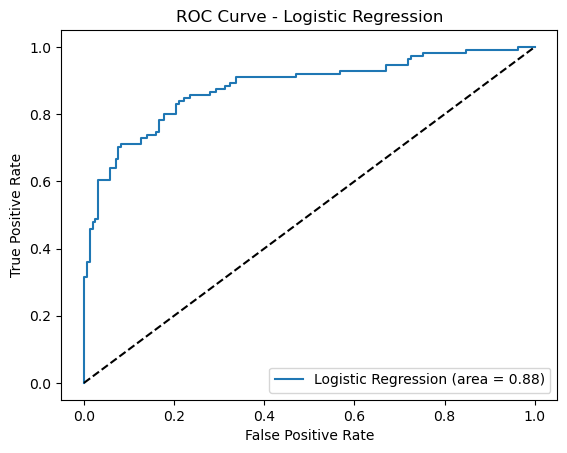

Confusion Matrix:
 [[154   3]
 [ 90  21]]
Accuracy: 0.6529850746268657
Precision: 0.875
Recall: 0.1891891891891892
F1-Score: 0.3111111111111111
ROC-AUC Score: 0.8496011935502381


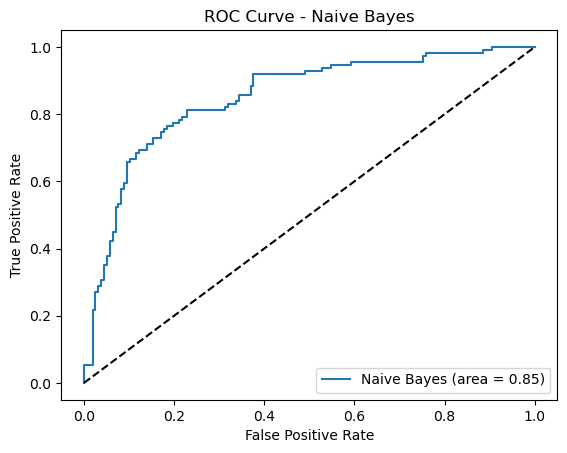

In [58]:
# Model
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Naive Bayes': GaussianNB()}

for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1]

    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Precision:", precision_score(y_test, y_pred))
    print("Recall:", recall_score(y_test, y_pred))
    print("F1-Score:", f1_score(y_test, y_pred))
    print("ROC-AUC Score:", roc_auc_score(y_test, y_proba))

    fpr, tpr, _ = roc_curve(y_test, y_proba)
    plt.figure()
    plt.plot(fpr, tpr, label=f'{model_name} (area = {roc_auc_score(y_test, y_proba):.2f})')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve - {model_name}')
    plt.legend(loc='lower right')
    plt.show()